In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [1]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving GOOGL.csv to GOOGL.csv


In [8]:
data=pd.read_csv('GOOGL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [9]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [10]:
data.shape

(4431, 7)

In [12]:
data=df['Close'].values
data

array([  50.220219,   54.209209,   54.754753, ..., 2797.360107,
       2765.51001 , 2831.439941])

In [13]:
data=data.reshape(-1,1)

In [14]:
data

array([[  50.220219],
       [  54.209209],
       [  54.754753],
       ...,
       [2797.360107],
       [2765.51001 ],
       [2831.439941]])

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)

In [16]:
scaled_data

array([[5.60505519e-05],
       [1.40975800e-03],
       [1.59489433e-03],
       ...,
       [9.32328062e-01],
       [9.21519383e-01],
       [9.43893427e-01]])

In [17]:
train_data=scaled_data[:int(len(scaled_data)*0.8)]
test_data=scaled_data[int(len(scaled_data)*0.8):]


In [18]:
train_data.size

3544

In [19]:
test_data.size

887

In [20]:
def createdataset(data,step=4):
    x,y=[],[]
    for i in range(len(data)-step):
        x.append(data[i:i+step, 0])
        y.append(data[i+step, 0])
    x=np.array(x)
    y=np.array(y);
    return x,y

In [21]:
x_train, y_train=createdataset(train_data)
x_test, y_test=createdataset(test_data)

In [22]:
x_test

array([[0.37661427, 0.37908483, 0.38151466, 0.38738558],
       [0.37908483, 0.38151466, 0.38738558, 0.38078503],
       [0.38151466, 0.38738558, 0.38078503, 0.3833099 ],
       ...,
       [0.88761726, 0.89140789, 0.90692686, 0.90676397],
       [0.89140789, 0.90692686, 0.90676397, 0.93232806],
       [0.90692686, 0.90676397, 0.93232806, 0.92151938]])

In [23]:
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 4, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(x_train,y_train, epochs=50, batch_size=4)

Epoch 1/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0015 - mae: 0.0171
Epoch 2/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.2348e-05 - mae: 0.0041
Epoch 3/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.9708e-05 - mae: 0.0039
Epoch 4/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.3981e-05 - mae: 0.0043
Epoch 5/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.7142e-05 - mae: 0.0037
Epoch 6/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.6046e-05 - mae: 0.0044
Epoch 7/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.7511e-05 - mae: 0.0044
Epoch 8/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.1080e-05 - mae: 0.0040
Epoch 9/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.8990e-05 - mae: 0.0039
Epoch 10/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.3158e-05 - mae: 0.0035
Epoch 11/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.1876e-05 - mae: 0.0034
Epoch 12/50
885/885 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.6642

In [25]:
y_pred=model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse)
print(mae)

5551.0714032498645
49.508173520292154


[]

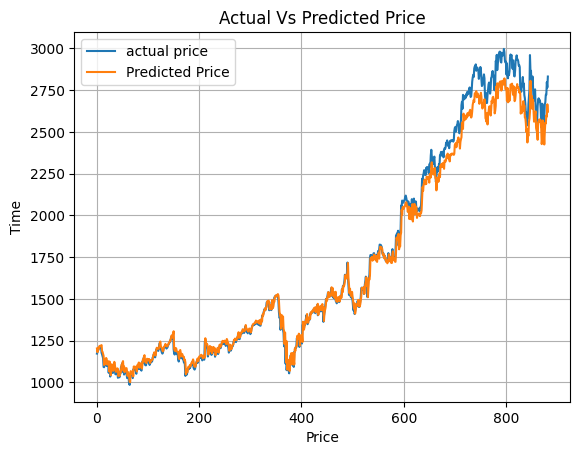

In [27]:
plt.plot(y_test,label='actual price')
plt.plot(y_pred,label='Predicted Price')
plt.title('Actual Vs Predicted Price')
plt.xlabel('Price')
plt.ylabel('Time')
plt.legend()
plt.grid(True)
plt.plot()
